# PCA Assignment | BRSM, Spring 2024
#### Nanda Rajiv | 2021115002

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

## 1. Wine Dataset

In [81]:
wine_df = pd.read_csv('wine_data.txt', sep=',')
wine_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


We separate this into two dataframes, X which constains the 13 features, and y which contains the target variable, 'Type'.

In [82]:
X = wine_df.drop('Type', axis=1)
y = wine_df['Type']

## 2. Principal Component Analysis

### 2.1 Correlation Heatmap for all the Features in the Dataset

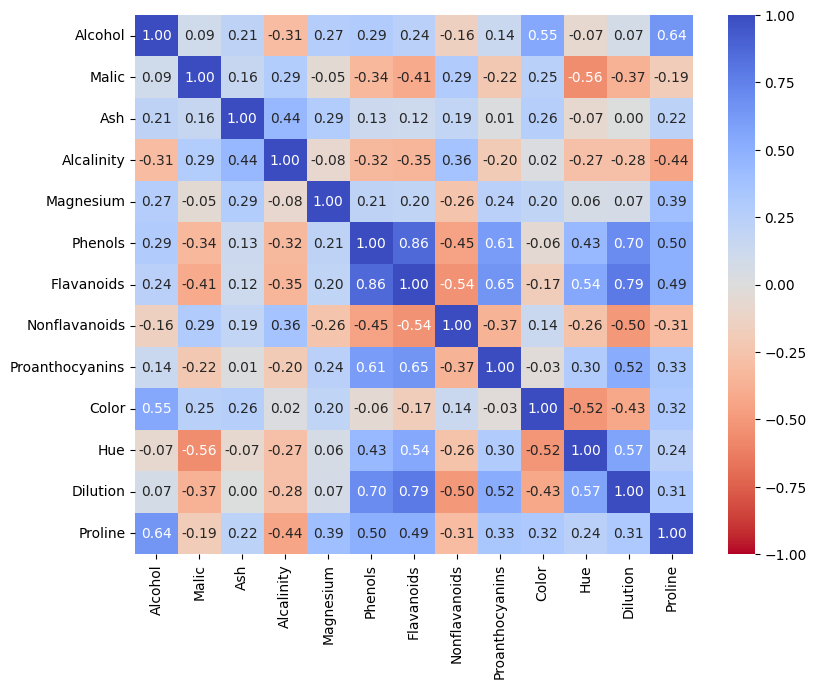

In [83]:
plt.figure(figsize=(9, 7))
# since the question asks for the correlation matrix of the features, we use the features dataframe
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm_r', vmin=-1, vmax=1, center=0)
plt.show()

We see that most of the features are positively correlated with one another. This means there is a good scope to reduce the dimensionality of the dataset using PCA.

### 2.2 Parallel Analysis on the Dataset

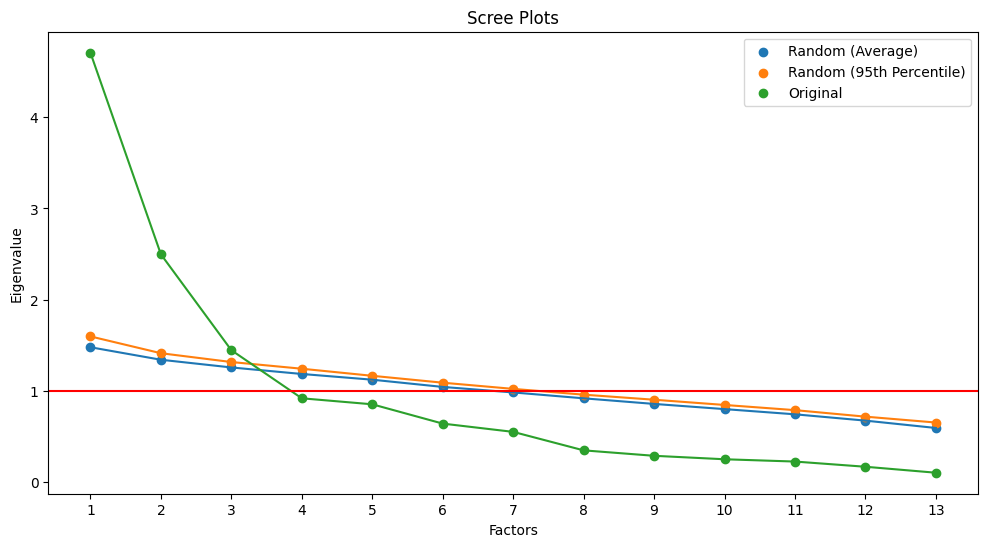

In [84]:
ev_list = []

for _ in range(50):
    random_data = np.random.rand(*X.shape)
    fa = FactorAnalyzer(n_factors=13, rotation=None)
    fa.fit(random_data)
    ev, _ = fa.get_eigenvalues()
    ev_list.append(ev)

ev_array = np.array(ev_list)
average_ev = np.mean(ev_array, axis=0)
percentile_95_ev = np.percentile(ev_array, 95, axis=0)

fa = FactorAnalyzer(n_factors=13, rotation=None)
fa.fit(X)
ev_original, _ = fa.get_eigenvalues()

plt.figure(figsize=(12, 6))

plt.scatter(range(1, X.shape[1]+1), average_ev, label='Random (Average)')
plt.plot(range(1, X.shape[1]+1), average_ev)
plt.scatter(range(1, X.shape[1]+1), percentile_95_ev, label='Random (95th Percentile)')
plt.plot(range(1, X.shape[1]+1), percentile_95_ev)
plt.scatter(range(1, X.shape[1]+1), ev_original, label='Original')
plt.plot(range(1, X.shape[1]+1), ev_original)

plt.title('Scree Plots')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.legend()
plt.axhline(1, color='r')
plt.xticks(range(1, X.shape[1]+1))
plt.show()

First, we generate 50 random datasets of the same shape as the wine dataset. We get the eigenvalues of those random datasets, and get their average and 95th percentile eigenvalues.<br><br>
The above figure plots three scree plots. The green plot is for the original eigenvalues, the blue is the average eigenvalues of the random data, and the orange is the 95th percentile eigenvalues of the random data. <br><br>
We see that the first three eigenvalues of the original data are greater than the first three 95th percentile eigenvalues of the random data (as well as average eigenvalues). This means that the first three principal components are significant.<br>
Beyond this, the eigenvalues of the original data are less than the 95th percentile eigenvalues of the random data. This means that the remaining principal components are not as significant.<br><br>
Parallel analysis recommends only retaining a number of components account for more variance than pure random chance, whereas the variance explained method recommends lesser reduction.<br>
That is to say, that every additional principal component does not explain very much about the variance in the data, and hence we can reduce the dimensionality of the dataset to 3 without losing very much information.

In [85]:
prop_var = ev_original / np.sum(ev_original)
for i in range(len(ev_original)):
    if i == len(ev_original) - 1:
        print(f'PC{i+1}: {prop_var[i]:.4f}')
    else:
        print(f'PC{i+1}: {prop_var[i]:.4f}, ', end='')

PC1: 0.3620, PC2: 0.1921, PC3: 0.1112, PC4: 0.0707, PC5: 0.0656, PC6: 0.0494, PC7: 0.0424, PC8: 0.0268, PC9: 0.0222, PC10: 0.0193, PC11: 0.0174, PC12: 0.0130, PC13: 0.0080


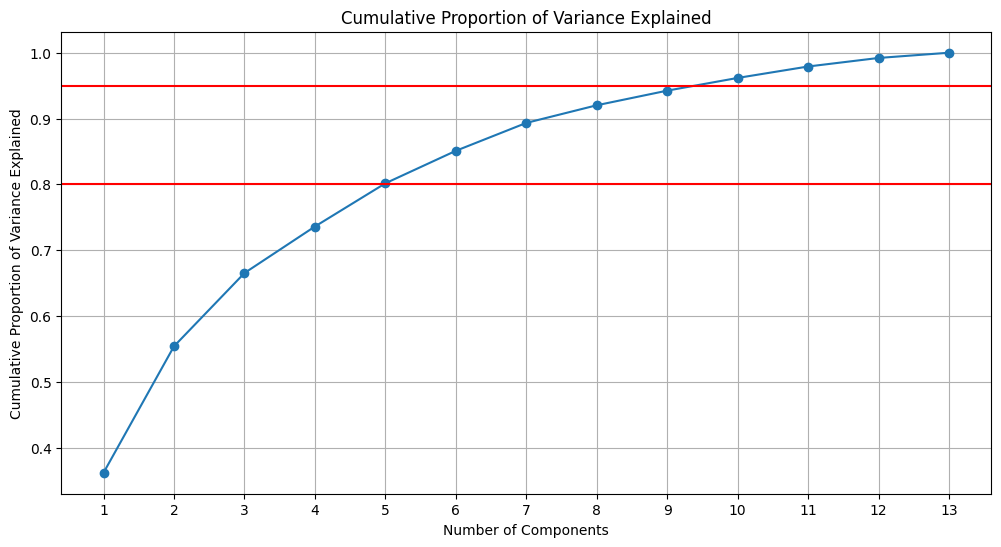

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, X.shape[1]+1), np.cumsum(prop_var), marker='o')
plt.title('Cumulative Proportion of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.grid()
plt.axhline(0.95, color='r')
plt.axhline(0.8, color='r')
plt.xticks(range(1, X.shape[1]+1))
plt.show()

<b> Parallel Analysis: </b> <br>
The recommended number of principal components from parallel is 3. The proportion of variance these explain is 66.53%.<br>
The other 10 components collectively explain 33.47% of the variance in the data.<br><br>

<b> Proportion of Variance Explained:</b><br>
To explain 80% of the variance, we need 5 principal components.<br>
To explain more than 95% of the variance, we need 10 principal components.<br><br>

What we understand is that the parallel analysis method (based on averages and 95th percentile of random data) recommends is that we can reduce the dimensionality of the dataset to 3 without losing very much information.<br>
On the other hand, if we set certain cutoffs based on the variance explained, then we need 5 dimensions for 80% of the variance, and 10 dimensions for 95% of the variance.<br><br>

Hence, parallel analysis is more conservative, and recommends only retaining a number of components account for more variance than pure random chance, whereas the variance explained method recommends lesser reduction.

### 2.3 PCA and Proportion of Variance Explained by First Three Components

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=13)
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

for i in range(3):
    print(f'PC{i+1}: {explained_variance_ratio[i]:.4f}')

PC1: 0.3620
PC2: 0.1921
PC3: 0.1112


The first component explains 36.2% of the variance, the second component explains 19.21% of the variance, and the third component explains 11.12% of the variance. Together, these three components explain 66.53% of the variance in the data.<br><br>
What this tells us about the dataset:
- Three components are sufficient to explain 66.53% of the variance in the data.
- The remaining 33.47% of the variance is explained by the other 10 components.
- This indicates that a significant portion of variance is explained by the first three components, and each of the remaining components do not explain much variance individually, but collectively explain 33.47%.
- There is, thus, scope to reduce the dimensionality using PCA, but there is some of the variance that is not accounted for in this reduction.

### 2.4 Scatter Plot of First Two Principal Components

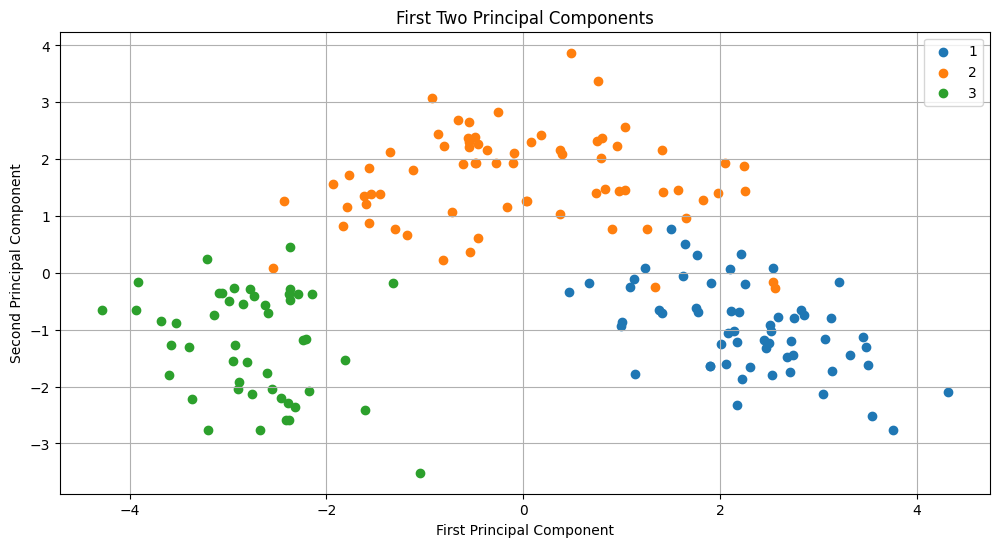

In [88]:
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(12, 6))

categories = np.unique(y)

for category in categories:
    mask = y == category
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=category)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components')
plt.grid()
plt.legend()
plt.show()

From the scatter plot, we see that the three types are separated quite well just by these two components. There are some of the type 2 that are more close to the type 1 and type 3, but overall, these components do a very good job of separating the three types of wine.<br><br>
Looking into the proportion of the variance explained by the first two components, we see that these two components explain 55.41% of the variance in the data. Thus, more than half of the variance is accounted for witin just these two components. This is a significant portion of the variance, and hence, these two components are able to separate the three types of wine quite well.

## 3. Chi-Square Test - Goodness of Fit

### 3.1 Formulating the null and alternative hypotheses,
Null Hypothesis H0: The observed distribution of wine types does not significantly differ from an equal distribution amongst the three types.<br><br>
Alternative Hypothesis Ha: The observed distribution of wine types significantly differs from an equal distribution amongst the three types.

### 3.2 Perform Chi-Square Test and Report Chi-Square Statistic and p-value

In [89]:
observed_frequencies = [59, 71, 48]
expected_frequencies = [sum(observed_frequencies) / 3] * 3

chi2, p = stats.chisquare(observed_frequencies, expected_frequencies)

# print the chi square statistic and the p-value
print(f'Chi-square Statistic: {chi2:.4f}')
print(f'Corresponding p-value: {p:.4f}')

Chi-square Statistic: 4.4607
Corresponding p-value: 0.1075


### 3.3 Interpretation of Results of Test

The results of the chi-square test for goodness of fit demonstrate that the p-value, which is 0.1075, is greater than 0.05, and hence we <b>fail to reject the null hypothesis</b>. This means that the observed frequencies of the three types of wine are not significantly different from the expected frequencies. <br><br>
So yes, the distribution of wine types in the dataset matches an expected distribution of an equal division amongst the types.

## 4. Chi-Square Test - Independence

### 4.1 Categorize the alcohol content into three levels 'low', 'medium' and 'high'

In [90]:
low_threshold = np.percentile(wine_df['Alcohol'], 33)
high_threshold = np.percentile(wine_df['Alcohol'], 67)

wine_df['Alcohol Category'] = pd.cut(wine_df['Alcohol'], bins=[0, low_threshold, high_threshold, 100], labels=['Low', 'Medium', 'High'])

### 4.2 Contingency Table

In [91]:
print("Contingency Table:\n")
contingency_table = pd.crosstab(wine_df['Type'], wine_df['Alcohol Category'])
print(contingency_table)

Contingency Table:

Alcohol Category  Low  Medium  High
Type                               
1                   0      17    42
2                  53      15     3
3                   6      28    14


### 4.3 Formulating Null and Alternative Hypotheses

Null Hypothesis H0: The types of wine and their alcohol content are independent of each other. That is, each type of wine has the same distribution of alcohol content.<br><br>
Alternative Hypothesis H1: The types of wine and their alcohol content are dependent on each other. That is, each type of wine has a different distribution of alcohol content.

### 4.4 Perform Chi-Squared Test and Report Chi-Square Statistic, Degrees of Freedom and Corresponding p-value

In [92]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'Degrees of Freedom: {dof}')
print(f'Corresponding p-value: {p}')

Chi-Square Statistic: 118.91532630299335
Degrees of Freedom: 4
Corresponding p-value: 9.105763009386742e-25


### 4.5 Interpretation of Results

We see that the p-value is far lesser than 0.05, which means that we reject the null hypothesis that the two variables are independent. This means that the type of wine and the distribution of alcohol content are dependent on each other. This means the three types of wine have different distributions of alcohol content.